# Step 9: Data Imbalance Handling

Data imbalance refers to situations where some classes in a dataset have significantly more samples than others. This is common in many real-world datasets and can lead to biased models. In this notebook, we explore techniques to handle imbalanced datasets to improve model performance.

---

## Table of Contents

1. [Introduction to Data Imbalance](#1-introduction-to-data-imbalance)
2. [Resampling Techniques](#2-resampling-techniques)
    - [Random Oversampling](#random-oversampling)
    - [Random Undersampling](#random-undersampling)
3. [Synthetic Data Generation - SMOTE](#3-smote-synthetic-minority-over-sampling-technique)
4. [Class Weight Adjustment](#4-class-weight-adjustment)
5. [Evaluation Metrics for Imbalanced Data](#5-evaluation-metrics)

---

## 1. Introduction to Data Imbalance

In imbalanced datasets, the distribution of class labels is unequal. This can cause machine learning models to be biased toward the majority class, leading to poor performance on the minority class.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Class Distribution:
 Target
0    906
1     94
Name: count, dtype: int64


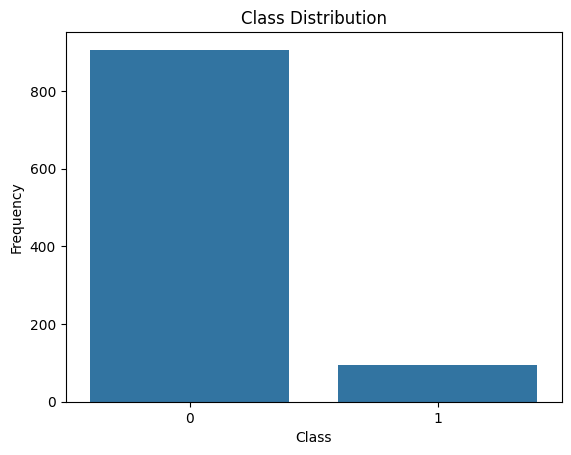

In [4]:
data = pd.read_csv('data_imbalance.csv')

target_distribution = data['Target'].value_counts()
print("Class Distribution:\n", target_distribution)

sns.countplot(x='Target', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## 2. Resampling Techniques

Resampling techniques modify the dataset to either increase the minority class (oversampling) or decrease the majority class (undersampling). Both techniques have their pros and cons, and it's essential to experiment with both to find the best approach.

### Random Oversampling
In random oversampling, we duplicate samples from the minority class to balance the dataset.

Oversampled Class Distribution:
 Target
0    906
1    906
Name: count, dtype: int64


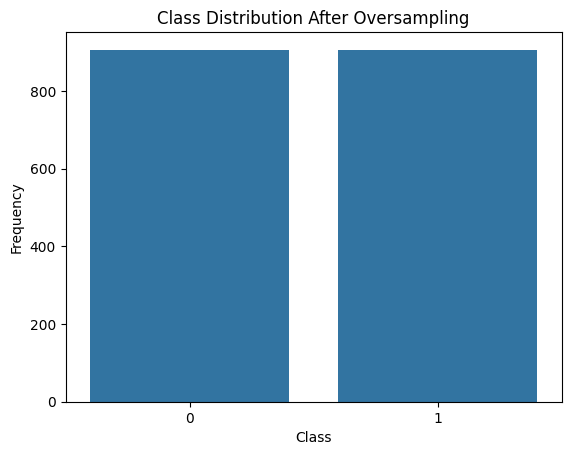

In [6]:
from sklearn.utils import resample

maj_class = data[data["Target"] == 0] 
min_class = data[data["Target"] == 1]

min_oversampled = resample(min_class,
                           replace=True,
                           n_samples=len(maj_class),
                           random_state=42)

oversampled_data = pd.concat([maj_class,min_oversampled])

print("Oversampled Class Distribution:\n", oversampled_data['Target'].value_counts())

sns.countplot(x="Target",data=oversampled_data)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Random oversampling increases the minority class by duplicating its samples to match the majority class.

### Random Undersampling
In random undersampling, we remove samples from the majority class to balance the dataset.

Undersampled Class Distribution:
 Target
0    94
1    94
Name: count, dtype: int64


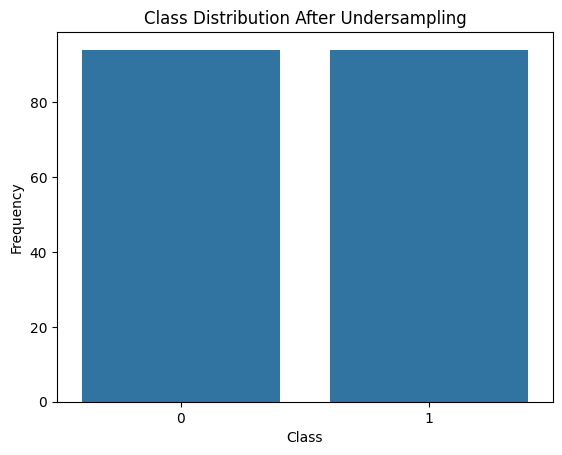

In [7]:
maj_undersampled = resample(maj_class,
                            replace=False,
                            n_samples= len(min_class),
                            random_state = 42)

undersampled_data = pd.concat([maj_undersampled,min_class])
print("Undersampled Class Distribution:\n", undersampled_data['Target'].value_counts())

sns.countplot(x='Target', data=undersampled_data)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Random undersampling reduces the size of the majority class by removing some of its samples.

## 3. SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a popular technique for generating synthetic samples for the minority class. It works by interpolating between existing samples of the minority class to create new, synthetic examples.

Class Distribution After SMOTE:
 [728 728]


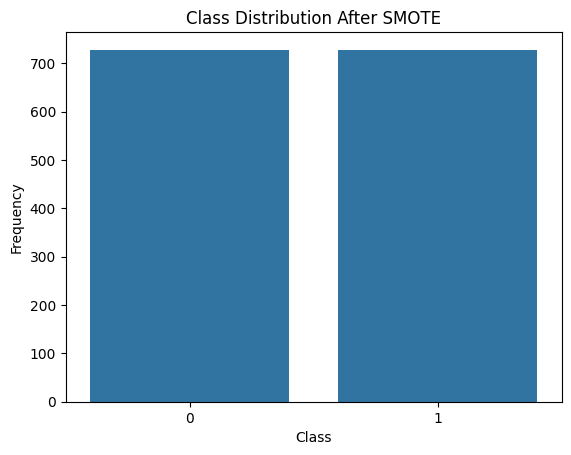

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Target"])
y = data["Target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 42)

smote = SMOTE(random_state=42)
X_smote,y_smote = smote.fit_resample(X_train,y_train)

print("Class Distribution After SMOTE:\n", np.bincount(y_smote))

sns.countplot(x=y_smote)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

SMOTE generates synthetic samples by interpolating between samples of the minority class, helping create a more balanced dataset.

## 4. Class Weight Adjustment

Some machine learning models allow you to adjust class weights to penalize the model more for misclassifying the minority class. This can be useful when resampling is not ideal.

In [20]:
# This code block is a sample. 
# We will learn what is Logistic Regression later

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(class_weight="balanced",random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       178
           1       0.12      0.50      0.19        22

    accuracy                           0.53       200
   macro avg       0.51      0.52      0.43       200
weighted avg       0.81      0.53      0.62       200



Class weighting tells the model to "pay more attention" to the minority class by increasing its importance in the loss function.

## 5. Evaluation Metrics

Accuracy (We will learn what is it) is often not the best metric for evaluating models on imbalanced datasets. Alternative metrics such as precision, recall, and the F1-score are better indicators of model performance.

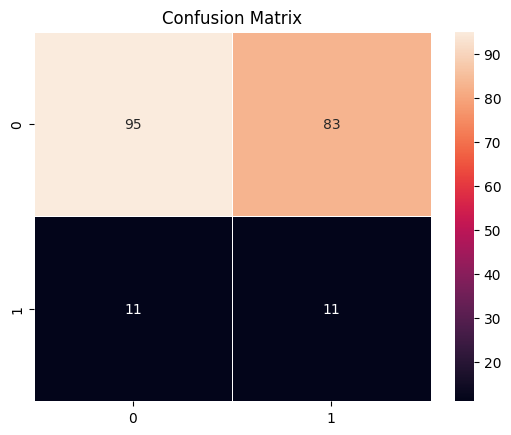

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,linewidths=.5,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [19]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.12
Recall: 0.50
F1 Score: 0.19


Use precision, recall, and F1-score to evaluate the model's performance on imbalanced datasets.